In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
#import the breast _cancer dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
#data

# Check the output classes
print(data['target_names'])
 
# Check the input attributes
print(data['feature_names'])
#data

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [4]:
# construct a dataframe using pandas
df1=pd.DataFrame(data['data'],columns=data['feature_names'])
#df1.head()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [13]:
# Scale data before applying PCA
scaling=StandardScaler()
 
# Use fit and transform method
scaling.fit(df1)
Scaled_data=scaling.transform(df1)
 
# Set the n_components=3
principal=PCA(n_components=3)
principal.fit(Scaled_data)
x=principal.transform(Scaled_data)
print(x)
# Check the dimensions of data after PCA
print(x.shape)

[[ 9.19283683  1.94858306 -1.12316647]
 [ 2.3878018  -3.76817173 -0.52929225]
 [ 5.73389628 -1.07517378 -0.55174708]
 ...
 [ 1.25617928 -1.90229671  0.56273064]
 [10.37479406  1.67201008 -1.87703036]
 [-5.4752433  -0.67063682  1.49044199]]
(569, 3)


In [14]:
# Check the values of eigen vectors
# prodeced by principal components
principal.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611303,
         0.15189161,  0.06016535, -0.03476751,  0.19034876,  0.36657547,
        -0.10555215,  0.08997969, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032157,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987842, -0.21935186,  0.17230436,
         0.14359318,  0.09796411, -0.00825723,  0.14188335,  0.27533947],
       [-0.00853125,  0.06454973, -0.00931425,  0.02869943, -0.10429177,
        -0.07409171,  0.00273334, -0.02556377, -0

Text(0, 0.5, 'pc2')

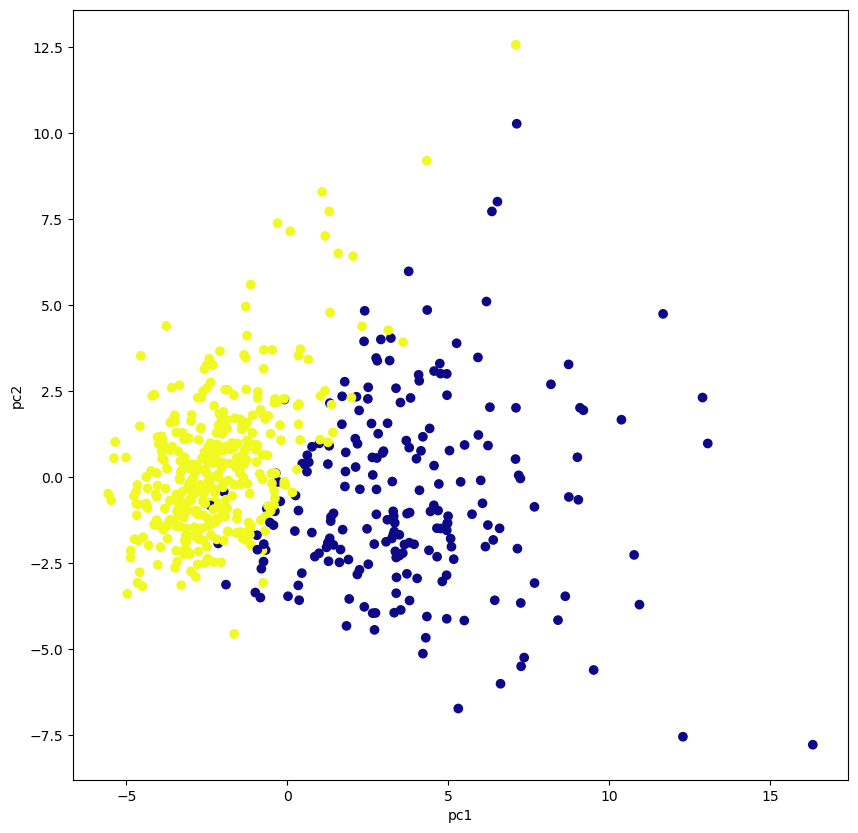

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=data['target'],cmap='plasma') #here C is for color,
#You can specify the colormap with the keyword argument cmap with the value of the colormap,
plt.xlabel('pc1')
plt.ylabel('pc2')
#plt.scatter(x[0:,0],x[:,2],c=data['target'],cmap='plasma')
#plt.xlabel('pc1')
#plt.ylabel('pc3')

Text(0.5, 0, 'PC3')

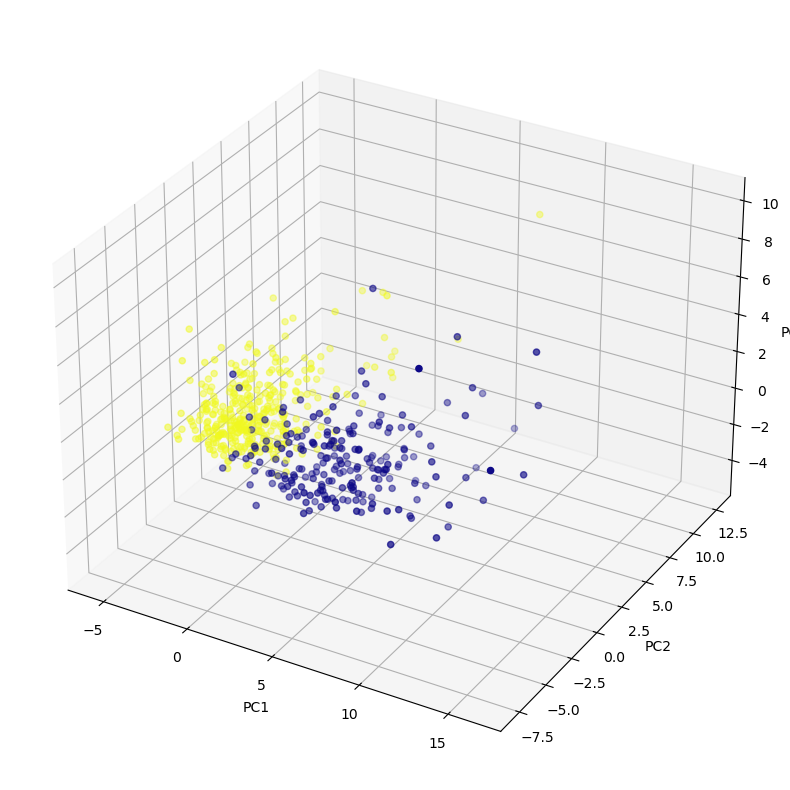

In [25]:
# import relevant libraries for 3d graph
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,11))
 
# choose projection 3d for creating a 3d graph
axis = fig.add_subplot(111, projection='3d')
 
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
axis.scatter(x[:,0],x[:,1],x[:,2], c=data['target'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)